# 교차 검증과 그리드 서치

## **주요 개념 정리**
- 결정 트리의 다양한 매개변수, 즉 hyper parameter를 자동으로 찾기 위한 방법
- hyper parameter를 결정하려면 많이 시도해보아야 하는데, 테스트 set을 사용해 자꾸 성능을 확인하다 보면, 점점 모델이 test set에 맞게 변화하게 됨
- test set으로 일반화 성능을 올바르게 예측하기 위해서 가능한 한 test set을 사용하지 말고 모델을 만들고 나서 마지막에 딱 한 번만 사용하는 것이 좋음

#### **검증 세트 validation set**
- 훈련 set와 test set으로 나눈 data에서 훈련 set을 또 다시 validation set과 훈련 set으로 나눈다.
1. 훈련 set에서 모델을 훈련하고 검증 세트로 모델을 평가
2. 테스트하고 싶은 매개변수를 바꿔가며 가장 성능이 좋은 매개변수로 만들어진 모델을 결정
3. 이 매개변수들을 사용해 훈련 set과 validation set을 합친 전체 훈련 data로 모델을 다시 학습
4. 마지막으로, 테스트 set에서 최종 점수를 평가



```python
# train_test split
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, random_state= 42)

# train_test_split() 함수를 2번 적용해서 validation set split
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)
```

### **교차 검증 Cross Validation**
- validation set을 만들게 되면 훈련 set이 줄어들게 됨

1. 교차 검증 : 검증 set을 떼어 내어 평가하는 과정을 여러번 반복
2. 이 점수를 평균하여 최종 검증 점수를 얻음

- 안정적인 검증 점수를 얻고 훈련에 더 많은 data를 사용 가능


```python
# sklearn의 cross_validate() : 교차 검증 함수
# 1. 평가할 모델 객체를 1번째 매개변수로 전달
# 2. 직접 검증 set을 분리하지 않고, 훈련 set 전체를 cross_validate 함수에 전달
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)
# fit_time, score_time : 각각 모델을 훈련하는 시간, 검증하는 시간
# 각 key 마다 5개의 숫자가 담겨 있음 = > cross_validate 함수는 기본적으로 5 - fold 교차 검증을 수행
# cv 매개변수를 통해 폴드 수를 지정 가능
# test_score 키 : validation set을 통한 모델 점수 => 최종 점수 : test_score 키에 담긴 5개의 점수를 평균하여 얻음
```
회귀 모델 : KFold 분할기를 기본으로 사용
분류 모델 : 타깃 class를 골고루 나누는 stratifiedKFold를 기본으로 사용
#### **splitter 분할기**

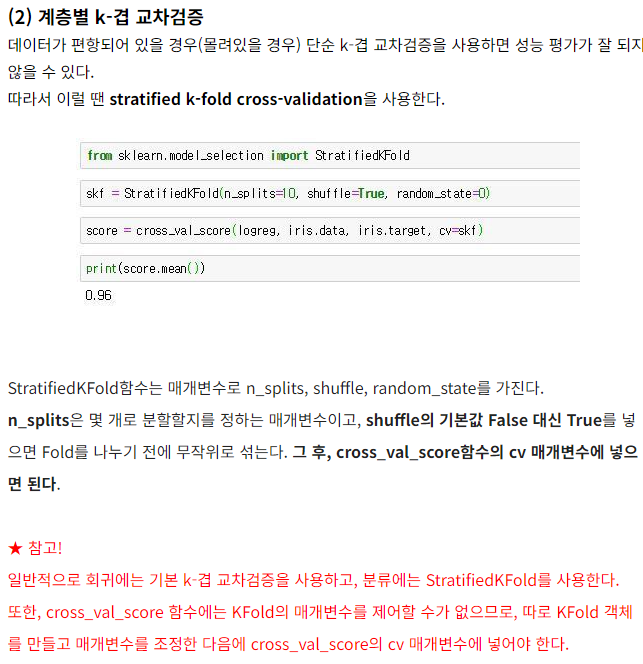

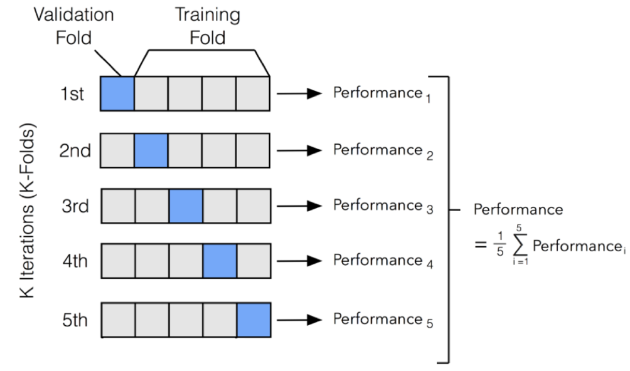

- hyper parameter 각각에 대한 검증을 하는 방법
---
- hyper parameter 후보를 입력해주어, 최적의 hyper parameter를 찾는 방법

### Hyper parameter tuning 하이퍼 파라미터 튜닝
- 머신러닝 모델이 학습하는 파라미터 : model parameter
- 모델이 학습할 수 없고, 사용자가 지정해야만 하는 parameter : hyper parmeter
- 사이킷런과 같은 머신러닝 라이브러리를 사용할 때 이런 하이퍼 파라미터는 모두 클래스나 메서드의 매개변수로 표현

### Auto ML : 사람의 개입 없이 하이퍼 파라미터를 자동으로 수행하는 기술

- 1개의 하이퍼 파라미터의 최적값을 찾은 후, 그 값을 고정하고 다른 하이퍼 파라미터의 최적값을 찾는 것은 불가능
- 하나의 값이 달라지면 다른 매개변수의 최적값도 달라지기에 여러 매개변수를 동시에 바꿔가면서 최적의 값을 찾아야 함

### **GridSearchCV 그리드 서치**
- 하이퍼 파라미터 탐색 & 교차 검증을 한 번에 수행 => 별도로 cross_validate() 함수를 호출하지 않아도 됨

```python
# n = -1 : 병렬 실행에 사용할 cpu 코어 수를 지정
# default 값 : 1
gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs = -1)
gs.fit(train_input, train_target)
```
1. 탐색할 매개변수를 dictionary 타입으로 입력
2. 훈련 set에서 grid search를 수행하여 최상의 평균 검증 점수가 나오는 매개변수 조합을 찾기 => 이 조합은 그리드 서치 객체에 저장됨
3. **그리드 서치는 최상의 매개변수에서 전체 훈련 set를 사용해 최종 모델을 훈련함 => 이 모델은 'best_estimator_' 객체에 저장됨**

- np.arange(a,b,c) : a~b-1 까지 c를 계속 더한 배열
- range(a,b,c) : a ~ b-1 까지 c를 계속 더한 정수 배열

### **Random Search 랜덤 서치**
- **매개변수 값의 목록을 전달하는 것이 아닌, 매개변수를 sampling할 수 있는 확률 분포 객체를 전달**
- **싸이파이 Scipy 라이브러리를 활용**
- uniform & randint 클래스 => 주어진 범위에서 고르게 값을 뽑음

```python
# n_iters : sampling 횟수
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), params, n_iter = 100, n_jobs = -1, random_state = 42)
gs.fit(train_input, train_target)
```
- 매개 변수 값이 수치형, 특히 연속적인 실숫값이라면 싸이파이의 확률 분포 객체를 전달하여 특정 범위 내에서 지정된 횟수만큼 매개변수 후보 값을 샘플링하여 교차 검증을 시도 가능

- 한정된 자원을 최대한 활용하여 효율적으로 하이퍼 파라미터 공간을 탐색할 수 있는 아주 좋은 도구

=>  수동으로 매개변수를 바꾸지 않고, 그리드 서치나 랜덤 서치를 사용

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 검증 세트

In [ ]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [ ]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


## 교차 검증

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00931716, 0.00749564, 0.00773239, 0.00731683, 0.00710797]), 'score_time': array([0.00109315, 0.00111032, 0.00101209, 0.00106931, 0.00115085]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [ ]:
import numpy as np

print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


## 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [ ]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [ ]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [ ]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [ ]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [ ]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [ ]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint

In [ ]:
rgen = randint(0, 10)
rgen.rvs(10)

array([4, 7, 6, 8, 9, 3, 8, 3, 1, 4])

In [ ]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([116, 105,  95, 100,  84,  90,  97,  95, 107, 111]))

In [ ]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.07156624, 0.51330724, 0.78244744, 0.14237963, 0.05055468,
       0.13124955, 0.15801332, 0.99110938, 0.08459786, 0.92447632])

In [ ]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cccce351cc0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cccce2f4610>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cccce352da0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cccce353bb0>},
                   random_state=42)

In [ ]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [ ]:
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

0.86


## 확인문제

In [ ]:
gs = RandomizedSearchCV(DecisionTreeClassifier(splitter='random', random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cccce351cc0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cccce2f4610>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cccce352da0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7cccce353bb0>},
                   random_state=42)

In [ ]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_
print(dt.score(test_input, test_target))

{'max_depth': 43, 'min_impurity_decrease': 0.00011407982271508446, 'min_samples_leaf': 19, 'min_samples_split': 18}
0.8458726956392981
0.786923076923077
